# Mapping marker properties to multivariate data

Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/multivariate_marker_plot.html#sphx-glr-gallery-lines-bars-and-markers-multivariate-marker-plot-py

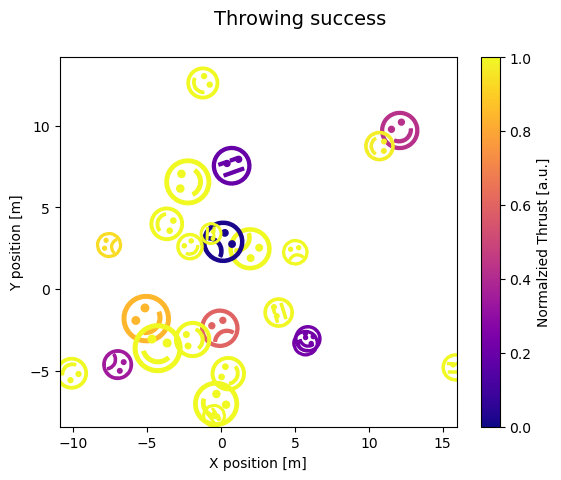

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

SUCCESS_SYMBOLS = [
    TextPath((0, 0), "☹"),
    TextPath((0, 0), "😒"),
    TextPath((0, 0), "☺"),
]

N = 25
np.random.seed(42)
skills = np.random.uniform(5, 80, size=N) * 0.1 + 5
takeoff_angles = np.random.normal(0, 90, N)
thrusts = np.random.uniform(0, 3, size=N)
successful = np.random.randint(0, 3, size=N)
positions = np.random.normal(size=(N, 2)) * 5
data = zip(skills, takeoff_angles, thrusts, successful, positions)

cmap = plt.colormaps['plasma']
fig, ax = plt.subplots()
fig.suptitle('Throwing success', size=14)
for skill, takeoff, thrust, mood, pos in data:
    t = Affine2D().scale(skill).rotate_deg(takeoff)
    m = MarkerStyle(SUCCESS_SYMBOLS[mood], transform=t)
    ax.plot(pos[0], pos[1], marker=m, color=cmap(thrust))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap=cmap),
             ax=ax, label='Normalzied Thrust [a.u.]')
ax.set_xlabel('X position [m]')
ax.set_ylabel('Y position [m]')

plt.show()